# Vehicle Insurance Claim Fraud Detection

## Step 1: Problem Statement

Insurance fraud poses a significant risk to insurance companies, resulting in increased claim costs and operational inefficiencies. Detecting fraudulent claims early is crucial to minimize losses and optimize investigation efforts.

The objective of this project is to apply machine learning techniques to identify fraudulent vehicle insurance claims using historical data.

## Problem Formulation
- **Type:** Supervised Machine Learning
- **Task:** Binary Classification
- **Target Variable:**
  - `1` → Fraudulent claim
  - `0` → Genuine claim

## Evaluation Strategy
Given the imbalanced nature of fraud detection datasets, the primary evaluation focus will be on:
- Recall
- Precision
- F1-Score
- ROC-AUC

Accuracy alone is not considered a reliable performance measure for this problem.


## Step 2: Data Loading and Understanding

In this step, the raw vehicle insurance claim dataset is loaded and analyzed to understand its structure, feature composition, and data quality. No preprocessing or feature engineering is performed at this stage.


In [2]:
import pandas as pd
import numpy as np

# Load dataset
data_path = "../data/raw/vehicle_claim_fraud.csv"
df = pd.read_csv(data_path)

# Basic inspection
df.head()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [3]:
# Dataset shape
df.shape


(15420, 33)

In [4]:
# Dataset information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [5]:
# List of columns
df.columns.tolist()


['Month',
 'WeekOfMonth',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'WeekOfMonthClaimed',
 'Sex',
 'MaritalStatus',
 'Age',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'FraudFound_P',
 'PolicyNumber',
 'RepNumber',
 'Deductible',
 'DriverRating',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'Year',
 'BasePolicy']

In [6]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numerical Features:", len(numerical_features))
print("Categorical Features:", len(categorical_features))


Numerical Features: 9
Categorical Features: 24


In [7]:
# Target variable distribution
df['FraudFound_P'].value_counts()


FraudFound_P
0    14497
1      923
Name: count, dtype: int64

## Dataset Overview and Target Variable Analysis

In this step, the vehicle insurance claim dataset was analyzed to understand its structure, feature composition, and target variable distribution before performing any preprocessing or modeling.

### Dataset Summary
- **Total records:** 15,420
- **Total features:** 33
- **Target variable:** `FraudFound_P`
  - `0` → Genuine claim
  - `1` → Fraudulent claim

### Target Variable Distribution
The distribution of the target variable is as follows:

- **Genuine claims (0):** 14,497  
- **Fraudulent claims (1):** 923  

Fraudulent claims constitute approximately **6%** of the dataset, while genuine claims make up about **94%**.

### Class Imbalance Observation
The dataset is **highly imbalanced**, which is a common characteristic of real-world fraud detection problems. This imbalance can cause machine learning models to be biased toward the majority class (genuine claims) if not handled carefully.

### Implications of Class Imbalance
- **Accuracy alone is not a reliable performance metric**, as a model predicting all claims as genuine would still achieve high accuracy.
- Greater emphasis must be placed on:
  - **Recall** → to capture as many fraudulent claims as possible
  - **Precision** → to avoid excessive false fraud alerts
  - **F1-score and ROC-AUC** for balanced evaluation

Handling this imbalance appropriately will be addressed in later stages of model training and evaluation.

---

### Key Data Understanding Observations
- The dataset contains **no missing values**, simplifying preprocessing steps.
- The **majority of features are categorical**, requiring careful encoding strategies.
- Some numerical columns, such as **`PolicyNumber` and `RepNumber`**, behave like identifiers and may not contribute meaningfully to fraud prediction.
- Fraud detection is inherently a **class-imbalanced problem**, which influences model selection and evaluation strategy.
- Several features represent **claim investigation signals** (e.g., police report filed, witness present), which may strongly correlate with fraudulent behavior and will be closely examined during exploratory data analysis.

These observations guide the exploratory data analysis and modeling decisions in subsequent steps.


# Step 3: Exploratory Data Analysis (EDA)

In this step, exploratory data analysis (EDA) is performed to understand patterns, relationships, and anomalies in the dataset, with a specific focus on identifying factors associated with fraudulent insurance claims.

The insights derived from this analysis will guide:
- Feature selection
- Feature transformation
- Modeling strategy

Special attention is given to class imbalance and fraud-indicating attributes.


## 3.1 Target Variable Distribution

This section visualizes the distribution of fraudulent and genuine insurance claims to better understand the level of class imbalance in the dataset.


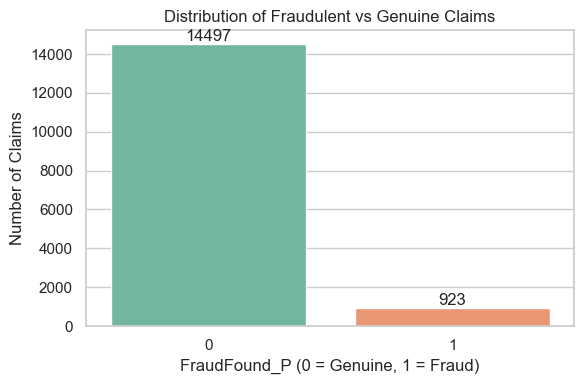

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot class distribution
plt.figure(figsize=(6,4))
ax = sns.countplot(x='FraudFound_P', hue='FraudFound_P',data=df, palette='Set2', legend=False)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.title("Distribution of Fraudulent vs Genuine Claims")
plt.xlabel("FraudFound_P (0 = Genuine, 1 = Fraud)")
plt.ylabel("Number of Claims")
plt.tight_layout()
plt.show()


### Insight
The visualization confirms a strong class imbalance, with fraudulent claims representing a small fraction of total claims. This reinforces the need for evaluation metrics such as recall, precision, and F1-score rather than relying solely on accuracy.


## 3.2 Univariate Analysis – Numerical Features

Univariate analysis is performed on numerical features to understand their distributions, detect skewness, and identify potential outliers.


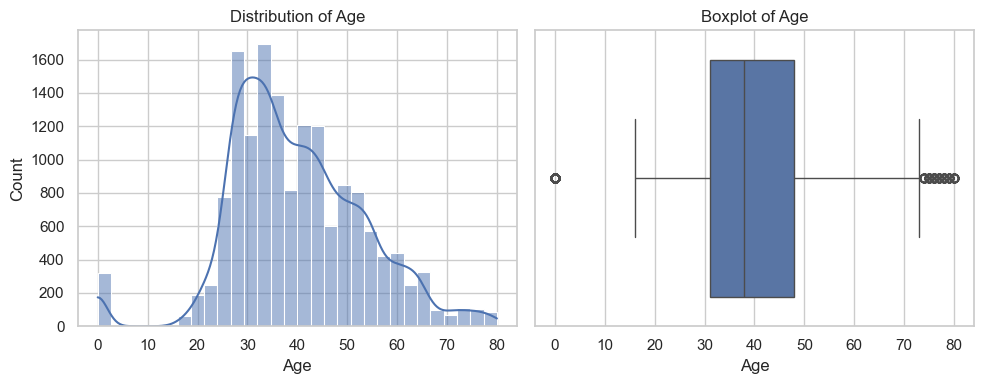

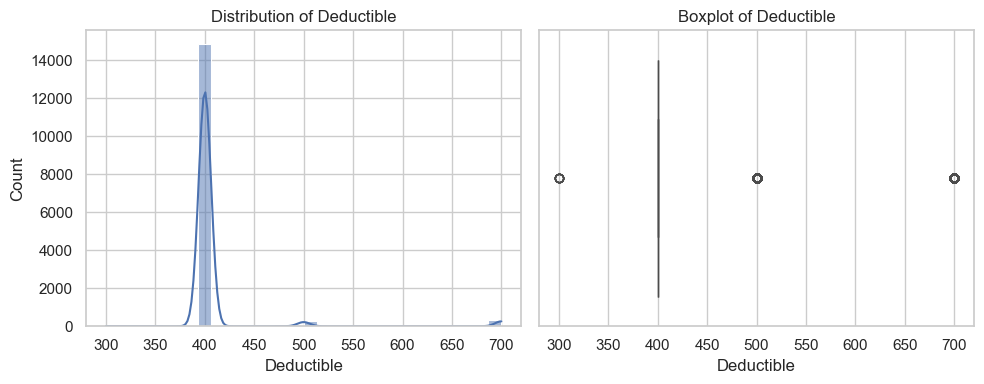

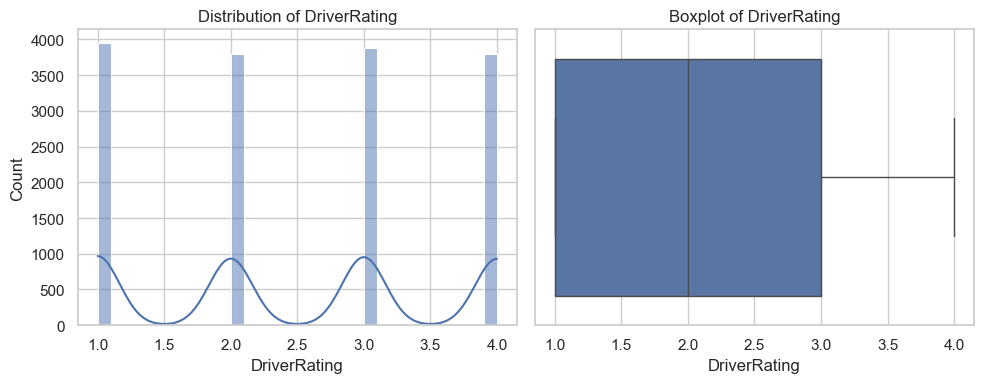

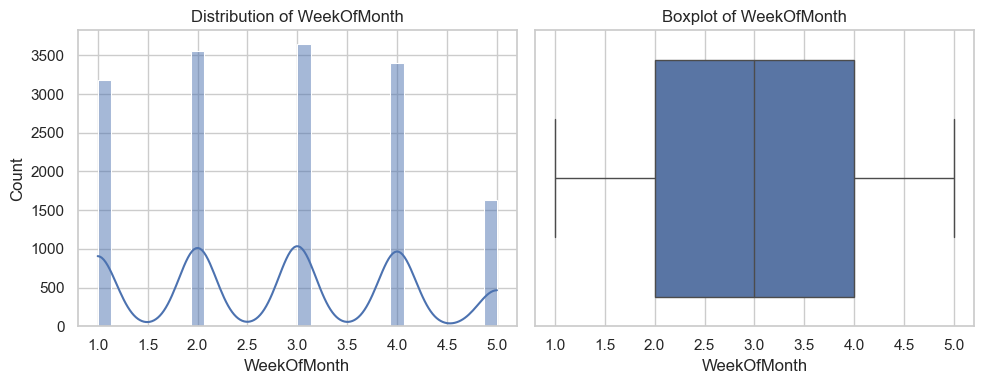

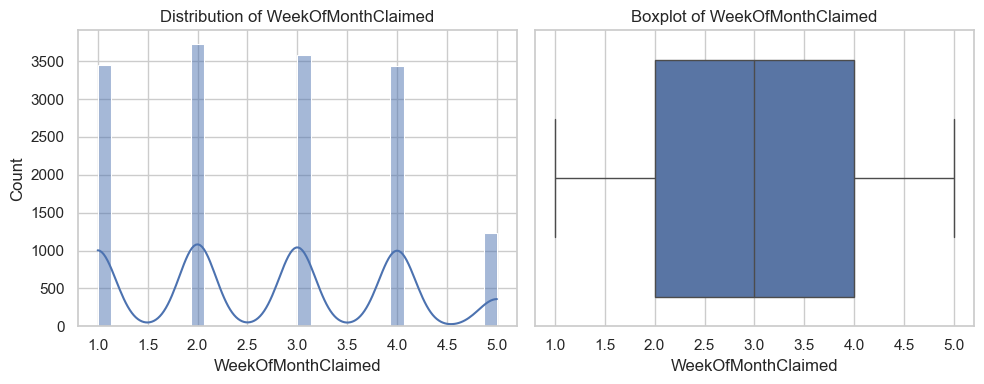

In [12]:
numerical_features = [
    'Age',
    'Deductible',
    'DriverRating',
    'WeekOfMonth',
    'WeekOfMonthClaimed'
]

for col in numerical_features:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()


## 3.3 Univariate Analysis – Key Categorical Features

This section analyzes high-impact categorical features that are expected to have strong relationships with fraudulent behavior.


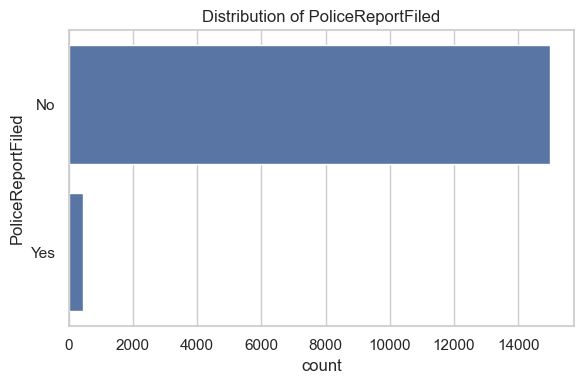

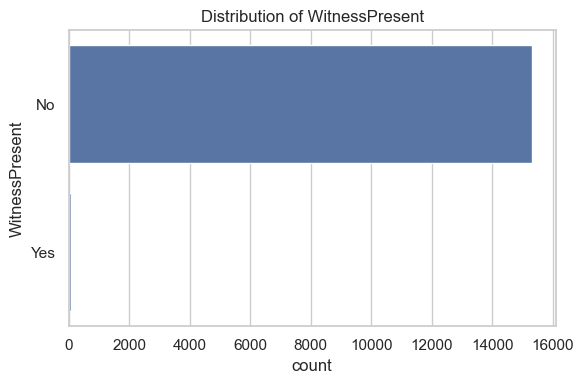

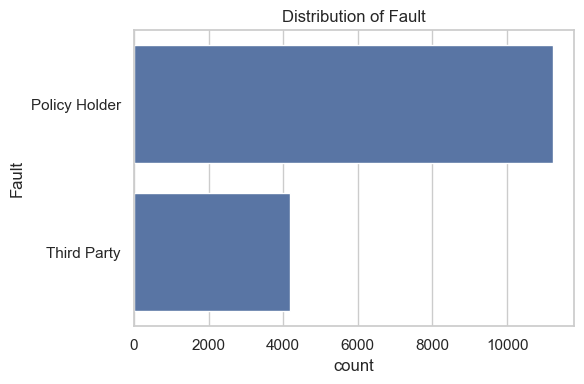

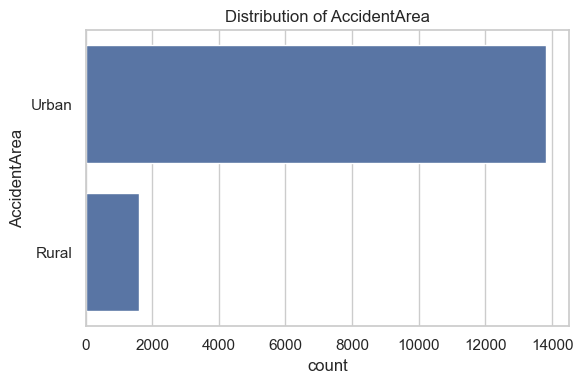

In [13]:
key_categorical_features = [
    'PoliceReportFiled',
    'WitnessPresent',
    'Fault',
    'AccidentArea'
]

for col in key_categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()


## 3.4 Bivariate Analysis – Feature vs Fraud

Bivariate analysis is performed to understand how individual features influence the likelihood of fraud.
Fraud rate per category is calculated for selected features.


In [14]:
for col in key_categorical_features:
    fraud_rate = df.groupby(col)['FraudFound_P'].mean().sort_values(ascending=False)
    display(fraud_rate.to_frame(name='Fraud Rate'))


,Fraud Rate
PoliceReportFiled,
No,0.060499
Yes,0.037383


,Fraud Rate
WitnessPresent,
No,0.060001
Yes,0.034483


,Fraud Rate
Fault,
Policy Holder,0.078896
Third Party,0.008831


,Fraud Rate
AccidentArea,
Rural,0.083229
Urban,0.057155
